In [ ]:
import pandas as pd
sortdf0=pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/Human/gogene_newmo.csv')
sortdf0

,gene,celltype,Dsp/V,Dsam/V,exp,exp2
0,RP5.1043L3.1,L3-5 IT-2,22561.148134,11.651604,0.030430,0.957145
1,IL12RB2,PVALB ChC,18482.498812,12.342234,0.033512,1.192282
2,RALYL,Oligo,12248.600524,3.684485,0.224166,3.641132
3,RP11.161I6.2,L6B,11779.398269,0.429968,0.073568,1.225215
4,NRG1,OPC,10791.992521,12.815434,0.155706,2.329031
...,...,...,...,...,...,...
650,ELMO1,LAMP5 LHX6,848.708041,4.091218,1.137078,2.058344
651,TNRC6A,L6B,846.766680,5.892426,2.073225,1.521939
652,GRM7,OPC,846.616991,6.282278,2.339012,1.253111
653,NUAK1,L6 CT,845.648914,7.790868,0.879545,1.487624


In [ ]:

n_df2=pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/Human/gogene_newmo_all.csv')
key_genes = list(set(n_df2['gene']))
result = {}

for gene in key_genes:
    try:
        gene_data = gogene_df[gogene_df['gene'] == gene]

        if not gene_data.empty:
            max_dsp_v_row = gene_data.loc[gene_data['Dsp/V'].idxmax()]
            exp_value = max_dsp_v_row['exp']
            result[gene] = exp_value
        else:
            print(f"Warning: Gene '{gene}' not found in gogene_newmo_all.csv")

    except Exception as e:  
        print(f"Error processing gene '{gene}': {e}")


result_df2 = pd.DataFrame.from_dict(result, orient='index', columns=['exp'])
print(result_df2)


                    exp
CCDC109B       0.052985
ING1           0.093838
SLC6A12        1.647475
TNFRSF11A      0.030763
OLFML2A        0.297726
...                 ...
NDUFA13        0.010646
RP11.406O23.2  0.015370
CPLX4          0.011399
RP11.333B11.1  0.032772
SIPA1L2        0.943479

[18967 rows x 1 columns]


In [ ]:

try:
    key_genes_df = pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/Human/key-genes-fdr', usecols=['gene'])  
except FileNotFoundError:
    print("Error: key-genes-fdr file not found.")
    exit()

try:
    gogene_df = pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/Human/gogene_newmo_all.csv')
except FileNotFoundError:
    print("Error: gogene_newmo_all.csv file not found.")
    exit()


key_genes = key_genes_df['gene'].tolist()
result = {}

for gene in key_genes:
    try:
        gene_data = gogene_df[gogene_df['gene'] == gene]

        if not gene_data.empty:
            max_dsp_v_row = gene_data.loc[gene_data['Dsp/V'].idxmax()]

            exp_value = max_dsp_v_row['exp']
            result[gene] = exp_value
        else:
            print(f"Warning: Gene '{gene}' not found in gogene_newmo_all.csv")

    except Exception as e:  
        print(f"Error processing gene '{gene}': {e}")
result_df = pd.DataFrame.from_dict(result, orient='index', columns=['exp'])
print(result_df)





                  exp
FBXO44       0.488567
NECAP2       0.112181
RP5.886K2.3  0.186316
HMGCL        0.080222
SRSF10       0.539763
...               ...
LRCH2        0.164023
LAMP2        0.218817
MCTS1        0.266014
PNMA3        0.398414
PNCK         0.434699

[575 rows x 1 columns]


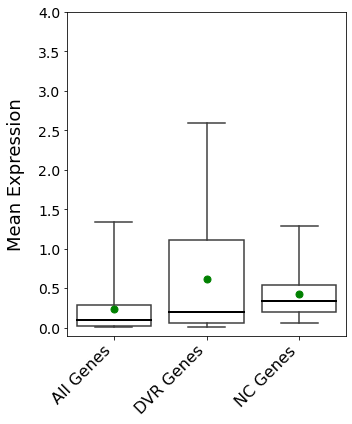

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set global font to a serif font like Times New Roman (for academic style)

#sampled_data = n_df2.sample(n=655)['exp']
plt.figure(figsize=(5, 6))

data=[result_df2['exp'],sortdf0['exp'],result_df['exp']]
labels=['All Genes', 'DVR Genes','NC Genes']  # Capitalize for better readability

# Use seaborn for a more aesthetically pleasing boxplot
sns.boxplot(data=data, whis=[2.5, 97.5], showmeans=True, 
            meanprops={"marker": "o", "markerfacecolor": "green", "markeredgecolor": "green", "markersize": 7},
            medianprops={"color": "black", "linewidth": 2},
            boxprops={"linewidth": 1.5, "facecolor": "none"},
            whiskerprops={"linewidth": 1.5},
            capprops={"linewidth": 1.5},flierprops={"marker": ""},palette=None)  # A visually appealing color palette


plt.ylabel('Mean Expression', fontsize=18,labelpad=13) # Slightly smaller font size
plt.xticks(range(len(labels)), labels, fontsize=16, rotation=45, ha="right") # Rotate labels and adjust alignment
plt.yticks(fontsize=14) 
plt.ylim(-0.1, 4)

# Remove top and right spines for a cleaner look
#sns.despine(top=True, right=True)

# Add a grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/fig/gene_exp_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()
